In [2]:
# libraries and constants
import numpy as np
import matplotlib.pylab as plt
from scipy.constants import c, h, hbar, Boltzmann, elementary_charge
k_B = Boltzmann

In [3]:
# planck's law in wavelength
def BB_wl(wl, T):

    # Calculate the exponential term
    exp_term = np.exp(h * c / (wl * k_B * T))

    # Apply Planck's Law formula
    intensity = (8 * np.pi * h * c / (wl**5)) * (1 / (exp_term - 1))

    return intensity

def RJ_wl(wl,T):
    return (8 * np.pi * k_B * T)/(wl**4)

def Wien_wl(wl,T):
    exp_term = np.exp(-h * c / (wl * k_B * T))
    return (8 * np.pi*h*c)*exp_term/(wl**5)

In [4]:
v_wl = np.linspace(200e-9, 6000e-9,1000)
T = 4000
v_BB = BB_wl(v_wl,T)
v_RJ = RJ_wl(v_wl,T)
v_Wien = Wien_wl(v_wl,T)

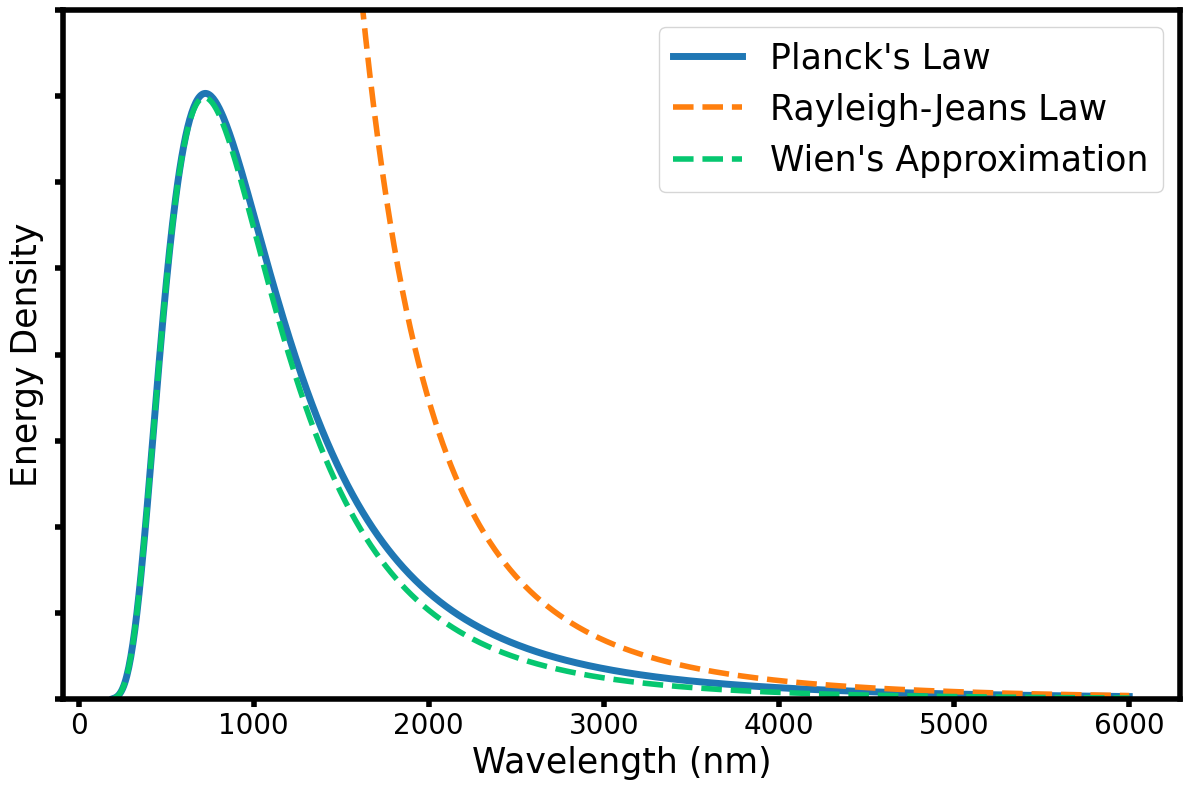

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
f_size = 25

# $I(\lambda, T) = \frac{8 \pi h c}{\lambda^5} \left( \frac{1}{e^{h c / (\lambda k_BT)} - 1} \right)$
# $I(\lambda, T) = \frac{8 \pi k_B T}{\lambda^4}$
# $I(\lambda, T) = 8 \pi h c \frac{e^{ -h c / (\lambda k_B T)})}{\lambda^{5}}$
ax.plot(1e9*v_wl,v_BB,label="Planck's Law",linewidth = 5.0)
ax.plot(1e9*v_wl,v_RJ,label=r"Rayleigh-Jeans Law",linewidth=4.0,linestyle='dashed')
ax.plot(1e9*v_wl,v_Wien,label=r"Wien's Approximation",linewidth=4.0,linestyle='dashed',color='#06c770')

# limits
ax.set_ylim(0.0,2e5)

# labels
ax.set_xlabel("Wavelength (nm)", fontsize=f_size)
ax.set_ylabel("Energy Density", fontsize=f_size)

# ticks
ax.tick_params(labelsize=f_size-5)
ax.set_yticklabels([])

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

# increase tick width
ax.tick_params(width=4,length=6)

# legend
plt.legend(fontsize=f_size)
fig.tight_layout()
fig.savefig('../figures/blackBody.png',dpi=600)